# Training a decision tree based on cleaned data

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
df=pd.read_csv("AER_credit_card_data_cleaned.csv")
df.head()

,card,reports,age,yearly_income,monthly_credit_card_expenditure,owner_of_house,selfemp,dependents,months_lived_in_current_address,majorcards,active_credit_accounts
0,1,0,37,45200,124,1,0,3,54,1,12
1,1,0,33,24200,9,0,0,3,34,1,13
2,1,0,33,45000,15,1,0,4,58,1,5
3,1,0,30,25400,137,0,0,0,25,1,7
4,1,0,32,97867,546,1,0,2,64,1,5


In [21]:
df.columns

Index(['card', 'reports', 'age', 'yearly_income',
       'monthly_credit_card_expenditure', 'owner_of_house', 'selfemp',
       'dependents', 'months_lived_in_current_address', 'majorcards',
       'active_credit_accounts'],
      dtype='object')

In [22]:
x=df.drop("card",axis=1)
x.head()

,reports,age,yearly_income,monthly_credit_card_expenditure,owner_of_house,selfemp,dependents,months_lived_in_current_address,majorcards,active_credit_accounts
0,0,37,45200,124,1,0,3,54,1,12
1,0,33,24200,9,0,0,3,34,1,13
2,0,33,45000,15,1,0,4,58,1,5
3,0,30,25400,137,0,0,0,25,1,7
4,0,32,97867,546,1,0,2,64,1,5


In [23]:
y=df.drop([ 'reports', 'age', 'yearly_income',
       'monthly_credit_card_expenditure', 'owner_of_house', 'selfemp',
       'dependents', 'months_lived_in_current_address', 'majorcards',
       'active_credit_accounts'],axis=1)
y.head()

,card
0,1
1,1
2,1
3,1
4,1


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50,stratify=y) 

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
param_grid={
    "criterion": ['gini','entropy'],
    "splitter": ['best','random'],
    "max_depth": [5,10,15,20],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

grid_search_tree=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid)

In [26]:
grid_search_tree.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [27]:
grid_search_tree.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [6]:
#Total_Dataset=1319, Train=923,Test=396
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50,stratify=y) 
tree_clf=DecisionTreeClassifier(max_depth=5)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
y_pred=tree_clf.predict(x_test)
y_act=[]
for i in y_test['card']:
    y_act.append(i)
compare_df=pd.DataFrame({'Actual':y_act,'Predicted':y_pred})
compare_df.head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0


### Confusion Matrix and Accuracy Score

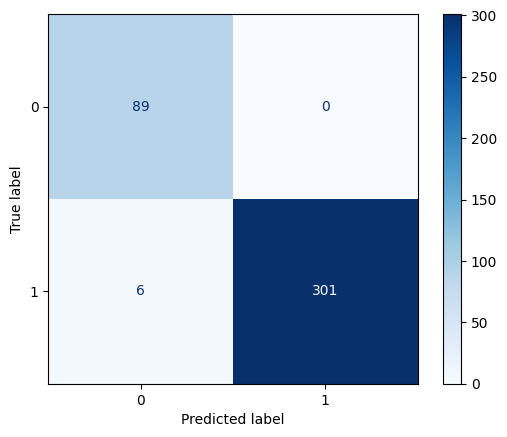

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

c_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=c_matrix).plot(cmap = plt.get_cmap('Blues'))

In [9]:
from sklearn.metrics import accuracy_score

print("Accuracy Score is: ",round(accuracy_score(y_pred,y_test),2))

Accuracy Score is:  0.98


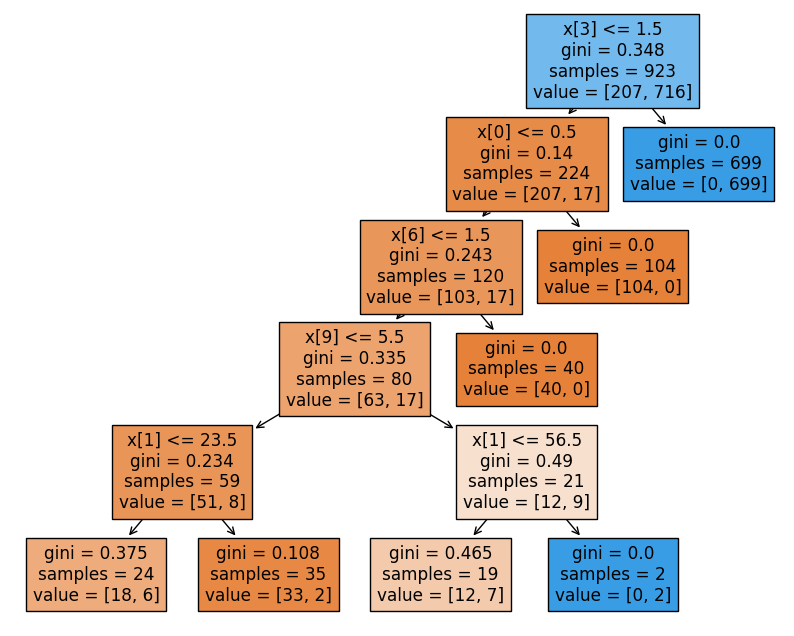

In [10]:
from sklearn import tree
# Plot the Decision Tree trained above with parameters filled as True
plt.figure(figsize = (10,8))
tree.plot_tree(tree_clf, filled = True)
plt.show()

In [11]:
# Use execute cells and below

import pickle
pickle.dump(tree_clf,open('Decision_Tree_Classifier_Model','wb'))

In [12]:
test_tree_model=pickle.load(open('Decision_Tree_Classifier_Model','rb'))

In [13]:
test_tree_model.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,